<div style="color:white;display:fill;border-radius:8px;font-size:200%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#fc6603'>AUTHOR: SOBIA ALAMGIR</span></b></p></div>

<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Titanic Dataset - Decision Tree Classifier</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>

- A **Decision Tree** is a supervised machine learning model used for classification and regression tasks. It works by splitting the data into subsets based on the values of the input features, forming a tree-like structure of decisions. 
  
- Each internal node represents a condition on a feature, each branch represents the outcome of that condition, and each leaf node represents a final decision or prediction. Decision Trees are intuitive, easy to interpret, and effective for both categorical and numerical data.

## Step-01 Load Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

## Step-02 Load Dataset

In [2]:
#train_df = pd.read_csv('/kaggle/input/titanic.csv')
#test_df = pd.read_csv('/kaggle/input/titanic.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Step-03 Data Preprocessing

* Lets check shape of the Dataset

In [4]:
print('Training Dataset')
print("No of Rows in Dataset:",train_df.shape[0])
print("No of Columns in Dataset:", train_df.shape[1])

Training Dataset
No of Rows in Dataset: 891
No of Columns in Dataset: 12


In [3]:
print('Testing Dataset')
print("No of Rows in Dataset:",test_df.shape[0])
print("No of Columns in Dataset:", test_df.shape[1])

Testing Dataset
No of Rows in Dataset: 418
No of Columns in Dataset: 11


* Let's check Information of Training Dataset

In [13]:
# For Training Dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Let's check Information about the Testing dataset

In [5]:
# For Testing Dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


* Let's check Missing values in the Training Dataset

In [6]:
# In Training Dataset
train_df.isnull().sum()/len(train_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
# Let's check Missing values In Testing Dataset
test_df.isnull().sum()/len(test_df)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

* Let's drop `Cabin' from both Training and Testing Datastet.
* This Feature has more than 70% null values.

In [8]:
train_df.drop('Cabin', axis = 1 , inplace=True)
test_df.drop('Cabin', axis = 1, inplace=True)

In [12]:
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
train_df['Embarked'].fillna(train_df['Age'].mode()[0], inplace= True)
test_df['Age'].fillna(test_df['Age'].mode()[0] , inplace= True)

C:\Users\Sobia Alamgir\AppData\Local\Temp\ipykernel_7564\3880639409.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
C:\Users\Sobia Alamgir\AppData\Local\Temp\ipykernel_7564\3880639409.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [14]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
test_df['Fare'].fillna(test_df['Fare'].mode()[0], inplace=True)

C:\Users\Sobia Alamgir\AppData\Local\Temp\ipykernel_7564\2544773403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].mode()[0], inplace=True)


In [11]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

* Let's check Descriptive Statistics of the Training Dataset

In [15]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Let's check Descriptive Statistics of Testing Dataset

In [31]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,28.364833,0.447368,0.392344,35.560497
std,120.810458,0.841838,13.180116,0.896760,0.981429,55.857145
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


* Let's check distribution of `Survived` vs `Not Survived` 

In [16]:
# In Training Dataset
plt = px.histogram(train_df , x = 'Survived' , color='Survived' , title='Distribution of Survived vs Not Survived')
plt.show()

* Let's check comparision using piechart

In [41]:
plt = px.pie(train_df, names = 'Survived' , color= 'Survived' , title='Comparision of Survived vs Not-Survived')
plt.show()

### **Insights:**

* Total Number of Survived are 342 or 38.4%
* Total Number of Not-Survived are 549 or 61.6%

In [42]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [48]:
plt = px.histogram(train_df , x='Survived', color = 'Sex',title="Comparision of Survived and Not Survived")
plt.show()

### **Insights:**

- Total Survived Male: 109
- Total Not-Surved Male: 468
- Total Survived Female: 233
- Total Not-Surved Female: 81


<Axes: xlabel='Pclass'>

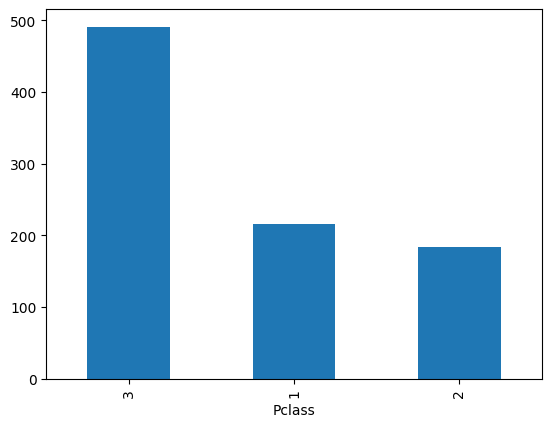

In [50]:
train_df['Pclass'].value_counts().plot(kind='bar')

#### **Let's drop Irrelevant columns**

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


* Let's drop Irrelevant columns `Name` , `PassengerID` and `Ticket` 

In [18]:
df = train_df.drop(columns=['Name','Ticket'])

In [19]:
test_df = test_df.drop(columns=['Name' , 'Ticket'])

In [20]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [21]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Step-04 Label Encoding

In [22]:
print('Uniques Values in Age: ',df['Sex'].unique())
print('Unique values in Embarked: ',df['Embarked'].unique())

Uniques Values in Age:  ['male' 'female']
Unique values in Embarked:  ['S' 'C' 'Q' 28.0]


In [23]:
df.groupby('Embarked')['Embarked'].count()

Embarked
28.0      2
C       168
Q        77
S       644
Name: Embarked, dtype: int64

In [24]:
mode_value = df['Embarked'].mode()[0]
df['Embarked'].replace(28.0,mode_value,inplace=True)

C:\Users\Sobia Alamgir\AppData\Local\Temp\ipykernel_7564\542192602.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [25]:
df.groupby('Embarked')['Embarked'].count()

Embarked
C    168
Q     77
S    646
Name: Embarked, dtype: int64

In [26]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [27]:
test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])

In [131]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


## Step-05 Data Splitting

In [29]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [30]:
len(X_train), len(X_test) , len(y_train) , len(y_test)

(712, 179, 712, 179)

In [79]:
len(test_df)

418

<!-- ## Step-06 Feature Scaling -->

In [ ]:
# scale = StandardScaler()

# X_train = scale.fit_transform(X_train)
# X_test= scale.fit_transform(X_test)

## Step-06 Hyperparameter Tunnning

In [51]:
model = RandomForestClassifier()
model_gradient_boosting = GradientBoostingClassifier()

In [55]:
params = {
    'criterion': ['gini','entropy'],
    'max_depth' : [3,5,10],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,5,10]
}

grid = GridSearchCV(
    estimator = model,
    param_grid=params,
    cv = 7,
    scoring = 'accuracy',
    n_jobs = -1
)

params_2 = {
    'criterion':['friedman_mse','squared_error'],
    'max_depth' : [3,5,10],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,5,10]
}

grid_2 = GridSearchCV(
    estimator = model_gradient_boosting,
    param_grid=params_2,
    cv = 7,
    scoring = 'accuracy',
    n_jobs = -1
)

## Step-07 Model fitting `Random Forest Classifier`

In [59]:
%%time
grid.fit(X_train,y_train)

CPU times: total: 2.02 s
Wall time: 28 s


GridSearchCV(cv=7, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [60]:
print('Best Parameters: ', grid.best_params_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


## Step-08 Model Fitting `Gradient Boosting Classifier`

In [56]:
grid_2.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [3, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [57]:
print('Best Parameters: ', grid_2.best_params_)

Best Parameters:  {'criterion': 'friedman_mse', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


## Step-09 Model Prediction 

In [80]:
# Prediction from testing data using Random Forest Classifier i.e. test.csv
y_pred_rfc = grid.predict(test_df)

In [81]:
# Prediction from testing data using Gradient Boosting Classifier i.e. test.csv
y_pred_gbc = grid_2.predict(test_df)

In [82]:
len(y_pred_rfc), len(y_pred_gbc)

(418, 418)

In [73]:
# Prediction from Random Forest Classifier [training data i.e. train.csv]
y_pred = grid.predict(X_test)

In [74]:
# Prediction from Gradient Boosting classifier
y2_pred = grid_2.predict(X_test)

In [78]:
len(y_pred), len(y2_pred)

(179, 179)

## Step-10 Save Tunned Model

In [36]:
import joblib
joblib.dump('grid', "RandomForestClassifier.pkl")

['RandomForestClassifier.pkl']

In [37]:
joblib.load("RandomForestClassifier.pkl")

'grid'

In [179]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [70]:
len(y_pred_rfc), len(y_pred_gbc)

(418, 418)

## Step-11 Model Evaulation

In [41]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [ ]:
# Random Forest Classifier
Accuracy = accuracy_score(y_test,y2_pred) # (test_df,y_pred)
print(f'Accuracy: {Accuracy:.2f}')

Accuracy: 0.81


In [65]:
# Gradient Boosting Classifier
Accuracy = accuracy_score(y_test,y3_pred) # (test_df,y_pred)
print(f'Accuracy: {Accuracy:.2f}')

Accuracy: 0.82


In [ ]:
# Accuracy = accuracy_score(y_test,y_pred) # (test_df,y_pred)
# print(f'Accuracy: {Accuracy:.2f}')

## Step-9 Predicted Dataset

In [45]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


**Let's check Prediction Dataset from Random Forest Classifier**

In [83]:
Predicted_df = pd.DataFrame({"PassengerId":test_df['PassengerId'] , "Survived": y_pred_rfc})

In [48]:
Predicted_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [49]:
Predicted_df.shape

(418, 2)

**Let's check Prediction Dataset from Gradient Boosting Classifier**

In [85]:
Predicted_df_gbc = pd.DataFrame({"PassengerId":test_df['PassengerId'] , "Survived": y_pred_gbc})
Predicted_df_gbc.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


* **Let's save the Passenger ID and predicted values of survived people using Random Forest Classifier**

In [86]:
Predicted_df.to_csv('Submission_titanic_rfc.csv')

* **Let's save the Passenger ID and predicted values of survived people using Gradient Boosting Classifier**

In [87]:
Predicted_df_gbc.to_csv('Submission_titanic_gbc.csv')

<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Thanks For Reading My Notebook!​</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>